In [2]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [3]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt 

torch.__version__

'2.2.0+cpu'

## 1. Data (Preparing and loading)
 Data can be almost anything... in machine learning
 <ul>
 <li>Excel spreadsheet</li>
 <li>Images of any kind</li>
 <li>Videos (Youtube has lots of data...)</li>
 <li>Audio like songs or podcasts</li>
 <li>DNA</li>
 <li>Text</li>
 </ul>

 Machine learning is a game of two parts:

 <ol>
 <li>Get data into a numerical representation</li>
 <li>Build a model to learn patterns in that numerical representation</li>
 </ol>

 we'll use a linear regression formula(y=a+mx) to make a straight line with known parameters.

In [4]:
#creating known parameters
weight = 0.8
bias = 0.6  

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start=start,end=end,step=step)
print(f"shape of X before : {X.shape} \n{X[:10]}")
X = X.unsqueeze(dim=1) # capital x shows that this indicates to tensor
print(f"after unsqueezing : {X.shape}")
#
#after unsqueezing : [1,len(X)]
y = weight*X + bias # follows linear regression y = mx + b

print(y[:10])

shape of X before : torch.Size([50]) 
tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800])
after unsqueezing : torch.Size([50, 1])
tensor([[0.6000],
        [0.6160],
        [0.6320],
        [0.6480],
        [0.6640],
        [0.6800],
        [0.6960],
        [0.7120],
        [0.7280],
        [0.7440]])


In [5]:
#here y is label for each X
len(X),len(y)

(50, 50)

### Spliting data into training and test sets (one of the most important concept in machine learning in general)

#### Let's create a training and test set with out data

In [6]:
split_train = int(0.8*len(X))

X_train = X[:split_train]
X_test = X[split_train:len(X)]

y_train = y[:split_train]
y_test = y[split_train:len(y)]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

### Visualize the data

In [7]:
def plot_prediction(train_data=X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    test_data_pred = None ,
                    predictions = None):
    """ 
    Plots training data, test data and compares predictions.
    """
    #define the size of the chart
    plt.figure(figsize=(5,5))


    #plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=5,label="training data")

    #plot test data in green
    plt.scatter(test_data,test_labels,c="g",s=15,label="testing data")

    if predictions is not None:
        #plot the predictions as well
        plt.scatter(test_data,predictions,c="r",s=5,label="predictions")

    #show the lagend
    plt.legend(loc="upper left")
        
    
    

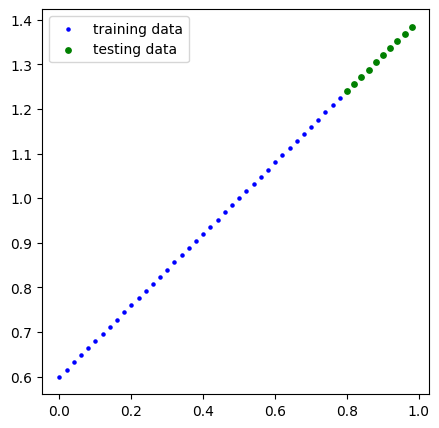

In [8]:
plot_prediction() # blue dots are ideal output

## Build Model

first PyTorch model!

What our model does:
<ul>
<li>Start with random values ( weights and bias )</li>
<li>Look at training data and adjust the random values to better represent ( or get closer to ) the ideal values (the weights and bias values we used to create the data)</li>
</ul>

How does it do so?

Through two main algorithms:
<ol>
<li>Gradient descent</li>
<li>Backpropagation</li>
</ol>


In [9]:
from torch import nn

#create linear regression model class
#every model in pytorch inherit from nn.module that's why you need to define forward method for overriding purpose


class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.Module
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weight and try to adjust it to the ideal weight
                                                requires_grad=True, # <- can this parameter be updated via gradient descent?
                                                dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
        
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias and try to adjust it to the ideal bias
                                             requires_grad=True, # <- can this parameter be updated via gradient descent?
                                             dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
        
        
        #Forward method to define the computation in the model 
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is input data
        return self.weights*x + self.bias # this is the linear regression formula

### PyTorch model building essentials

<ul>
<li><b>torch.nn</b> - contains all of the buildings for computational graphs ( a neural network can be considered a computational graph )</li>
<li><b>torch.nn.Parameter</b> - what parameters should our model try and learn, often a  PyTorch layer from torch.nn will set these for us</li>
<li><b>torch.nn.Module</b> - The base class for all neural network modules, if you subclass it, you should overwrite forward()</li>
<li><b>torch.optim</b> - where the optimizers in PyTorch live, they will help with gradient descent, it is basically an algorithm</li>
<li><b>def forward()</b> - All nn Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation</li>
</ul>

Here is the cheat sheet you can go through : https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of our PyTorch model

we have created the model, let's see what's inside...
So we can check our model parameters or what's inside out model using .parameters()

In [10]:
#Create a random seed
torch.manual_seed(42)

#create an instance of the model ( this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
#listing named parameters
model_0.state_dict()
# model_0.weights, model_0.bias

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
#listing known parameters
weight,bias

(0.8, 0.6)

Here the task is to take the value of named params to near to known params, the closer we get the values the better we will able to predict data in model

### Make predictions using <code>torch.inference_mode()</code>
To check our model's predictive power, let's see how well it predicts <code>y_test</code> based on <code>x_test</code>
When we pass data through our model, it's going to run it through the <code>forward()</code> method.

In [13]:
# make predictions using model
#   inference mode desables all the things required while training a model. actually it does not track 
# the gradient descent, with larger dataset your predictions would be more faster
with torch.inference_mode():
    y_preds = model_0(X_test)

#in older PyTorch code you might also see torch.no_grad(),but inference mode is recommended as it is more faster
# with torch.no_grad():
#     y_preds = model_0(X_test)

40


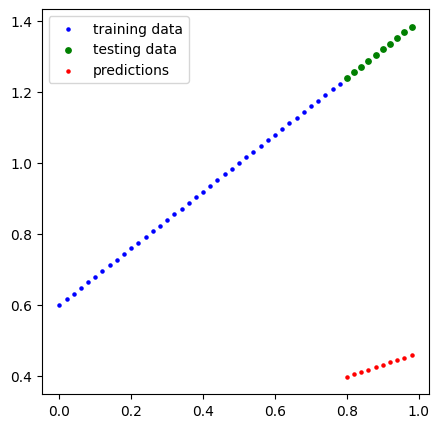

In [14]:
print(len(X_train))
plot_prediction(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_preds) 

## Training this model

The whole idea of training is for a model to move from some <i>unknown</i> parameters (these may be random) to some <i>known</i> parameters.

or in other words from a poor representation of the data to a bettere representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

<b>Note:</b> Loss function may also be called cost function or criterion in defferent areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

<b>Loss function: </b> A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
<b>Optimizer: </b> Takes into account the loss of a model and adjusts the model's parameters (w and b in our case) to improve the loss function.

#### loss function measures how wrong our model is and optimizer adjust our model parameters to reduce the loss 

<ul>
<li>Inside the optimizer you'll often have to set two parameters:</li>
<ul>
<li><code>params</code> - the model parameters you'd like to optimize, for example <b>params=model_0.parameters()<b></li>
<li><code>lr</code> - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step ( a small lr results in small changes, a large lr results in large changes)</li>
</ul>
</ul>

And specifically for PyTorch, we need:
1. A training loop
2. A testing loop

In [15]:
#check out our model's parameters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
#setup a loss function which follows the MAE ( Mean Absolute Error )
loss_fun = nn.L1Loss()
loss_fun   

L1Loss()

In [17]:
#setup an Optimizer (SGD-Stochastic Gradient Descent)
Optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = Learning Rate = possibly the most imp hyperparameter you can set
                                     # smaller the lr, changes in lr will be smaller 
                                     # larger the lr, changes in lr will be larger 
    

### Building a training and testing loop ( and a testing loop ) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass ( this involves data moving from input to output ) to make prediction on data
2. calculate the loss ( compare forward pass predictions to graoud truth labels )
3. Optimizer zero grad
4. loss backwards - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust out model's parameters to try and improve the loss  


#### Gradient : 
change in loss with respect to model parameteres, here change in loss with respect to w and b

Epoch : 0 | Loss : 0.6518813967704773 | Test loss : 0.8700652122497559
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Loss : 0.5366714000701904 | Test loss : 0.7353552579879761
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Loss : 0.42146140336990356 | Test loss : 0.6006453633308411
OrderedDict([('weights', tensor([0.4186])), ('bias', tensor([0.3388]))])
Epoch : 30 | Loss : 0.306251585483551 | Test loss : 0.46593552827835083
OrderedDict([('weights', tensor([0.4576])), ('bias', tensor([0.4388]))])
Epoch : 40 | Loss : 0.19104167819023132 | Test loss : 0.3312256634235382
OrderedDict([('weights', tensor([0.4966])), ('bias', tensor([0.5388]))])
Epoch : 50 | Loss : 0.0826275423169136 | Test loss : 0.2021670788526535
OrderedDict([('weights', tensor([0.5354])), ('bias', tensor([0.6333]))])
Epoch : 60 | Loss : 0.049004387110471725 | Test loss : 0.1324913203716278
OrderedDict([('weights', tensor([0.5676])), ('bias', te

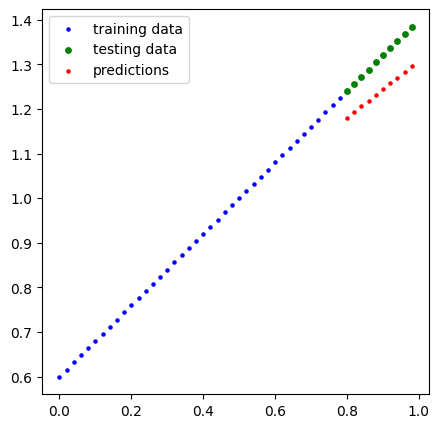

In [18]:
#An epoch is one loop through the data... ( this is a hyperparameter because we've set it ourselves)
import time
epochs = 100

epoch_counts = []
train_loss_count = []
test_loss_count = []
# TRAINING and TESTING loop

#Training

    # 0. Loop through the data 
for epoch in range(epochs):
    #set the model to training mode
    model_0.train() # train mode in pytorch sets all parameters that requires gradients to require gradients

    # 1. Forward pass
    train_predictions = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fun(train_predictions,y_train)

    # 3. Optimizer zero grad
    Optimizer.zero_grad()

    # 4. perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    Optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop
    

#Testing 

    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layer)  

    
    with torch.inference_mode(): # turn off gradient tracking and a couple more things behind the scenes
        # 1. do the forward pass
        test_predictions = model_0(X_test)

        # 2. calculate the loss
        test_loss = loss_fun(test_predictions,y_test)

    #print what is happening?
    if epoch%10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")
        epoch_counts.append(epoch)
        train_loss_count.append(loss)
        test_loss_count.append(test_loss)
        #print out model state_dict()
        print(model_0.state_dict())

plot_prediction(predictions=test_predictions)


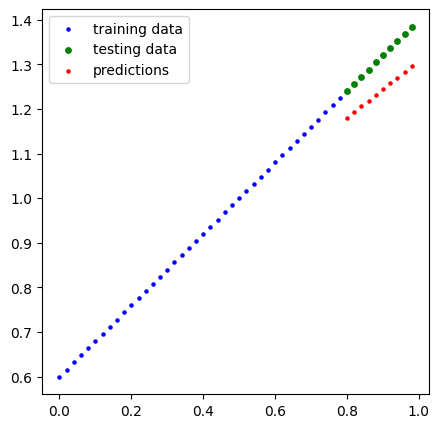

In [19]:
#after 100 epochs
plot_prediction(predictions=test_predictions)


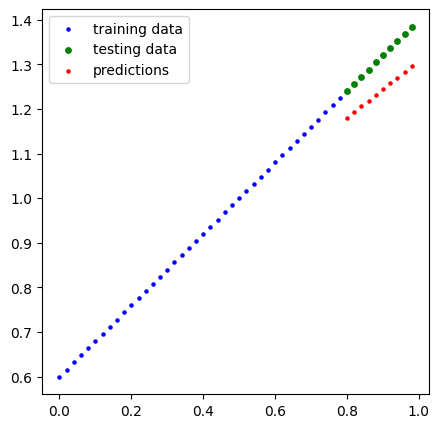

In [20]:
#after 200 epochs
plot_prediction(predictions=test_predictions)


Here thing to remember is that we can't plot pytorch array on the graph, for plotting we need to convert it into numpy array

In [21]:
import numpy as np
train_loss_count_numpy = []
test_loss_count_numpy = []

#converting tensors into numpy array you can only run it once because after one execution tensors are converted into arrays and it won't have detach() method like tensor
for i in range(len(train_loss_count)):
    train_loss_count[i] = train_loss_count[i].detach().numpy()
    train_loss_count_numpy.append(train_loss_count[i])
for i in range(len(test_loss_count)):
    test_loss_count[i] = test_loss_count[i].detach().numpy()
    test_loss_count_numpy.append(test_loss_count[i])

In [22]:
train_loss_count_numpy,test_loss_count_numpy

([array(0.6518814, dtype=float32),
  array(0.5366714, dtype=float32),
  array(0.4214614, dtype=float32),
  array(0.3062516, dtype=float32),
  array(0.19104168, dtype=float32),
  array(0.08262754, dtype=float32),
  array(0.04900439, dtype=float32),
  array(0.04228804, dtype=float32),
  array(0.03865168, dtype=float32),
  array(0.03517448, dtype=float32)],
 [array(0.8700652, dtype=float32),
  array(0.73535526, dtype=float32),
  array(0.60064536, dtype=float32),
  array(0.46593553, dtype=float32),
  array(0.33122566, dtype=float32),
  array(0.20216708, dtype=float32),
  array(0.13249132, dtype=float32),
  array(0.10409262, dtype=float32),
  array(0.09171686, dtype=float32),
  array(0.08138393, dtype=float32)])

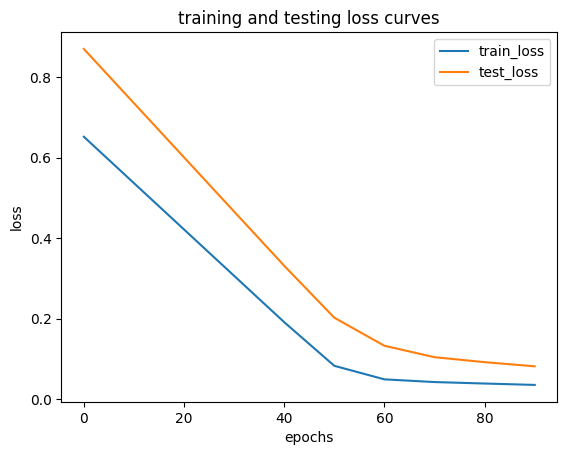

In [23]:
plt.plot(epoch_counts,train_loss_count_numpy,label="train_loss")
plt.plot(epoch_counts,test_loss_count_numpy,label="test_loss")
plt.title("training and testing loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

### Saving a model in pytorch

Three main methods for saving and loading model with pytorch

1. torch.save() - allows you save a pytorch object in python's pickle format
2. torch.load() - allows you load a saved pytorch object
3. torch.nn.Module.load_state_dict() - this allows to load a model's saved state dictionary

In [24]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6421])), ('bias', tensor([0.6663]))])

And the original values for weights and bias are:
weights: 0.8, bias: 0.6


In [25]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[1.1800],
        [1.1928],
        [1.2057],
        [1.2185],
        [1.2314],
        [1.2442],
        [1.2570],
        [1.2699],
        [1.2827],
        [1.2956]])

In [26]:
# Saving a pytorch model
MODEL_NAME = "01_Linear_regression_model_pytorch_workflow.pth"
PATH = f"./models/{MODEL_NAME}"

#save the model state dict

print(f"saving model to path : {PATH}")
torch.save(obj=model_0.state_dict(),f=PATH)

saving model to path : ./models/01_Linear_regression_model_pytorch_workflow.pth


In [27]:
!instantiate the new model

new_model = LinearRegressionModel()

new_model.load_state_dict(torch.load(PATH))



<All keys matched successfully>

In [28]:
new_model.eval()

new_model_preds = new_model(X_test)

In [29]:
y_preds == new_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])